In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from tensorflow import keras
import seaborn as sns



In [3]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
dataset= image_dataset_from_directory("/content/db",
                             shuffle=True,
                             image_size=(256,256),
                             batch_size=32



                             )

Found 2152 files belonging to 3 classes.


In [6]:
classes= dataset.class_names

In [7]:
batch_Size =32
image_size=32


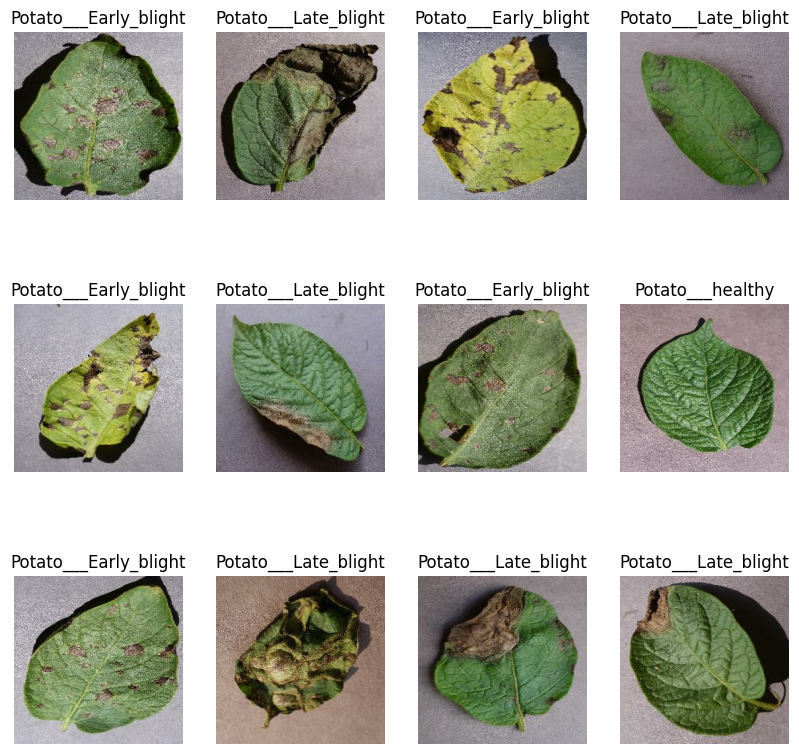

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
 for i in range(12):
   ax = plt.subplot(3,4,i+1)
   plt.imshow(image_batch[i].numpy().astype("uint8"))
   plt.title(classes[label_batch[i]])
   plt.axis("off")


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
train_size =0.8
validation=0.1
test=0.1


In [11]:
train_Ds= dataset.take(54)
len(train_Ds)


54

In [12]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds_final= test_ds.skip(6)
len(test_ds_final)

8

In [15]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    ds= ds.shuffle(shuffle_size,seed=12)
    ds_size = len(ds)
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)












  return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [17]:

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
print(tf.__version__)

2.17.1


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

# Define preprocessing pipeline
preprocessing_layer = Sequential([
    Resizing(256, 256),    # Resize images to 256x256
     Rescaling(1.0 / 255)   # Normalize pixel values to [0, 1]
        ])

print(preprocessing_layer)


<Sequential name=sequential, built=False>


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation

# Define data augmentation pipeline
augmentation_layer = Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
        RandomRotation(0.2)  # Randomly rotate images by up to 20% of a full circle
        ])

print(augmentation_layer)


<Sequential name=sequential_1, built=False>


#CNN Model Training

In [21]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,InputLayer


In [22]:
model = Sequential([
    InputLayer(input_shape=(256,256,3)),
    preprocessing_layer,

    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')

]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.build()


In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']




)

In [25]:
history =model.fit(

          train_ds,
          epochs=50,
          batch_size=32,
          verbose=1,
          validation_data=val_ds

)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.4649 - loss: 0.9467 - val_accuracy: 0.6719 - val_loss: 0.8394
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.6264 - loss: 0.7551 - val_accuracy: 0.7083 - val_loss: 0.6425
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7787 - loss: 0.4887 - val_accuracy: 0.8333 - val_loss: 0.3593
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8922 - loss: 0.2826 - val_accuracy: 0.7917 - val_loss: 0.4670
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8369 - loss: 0.4156 - val_accuracy: 0.8698 - val_loss: 0.2687
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9093 - loss: 0.2590 - val_accuracy: 0.8958 - val_loss: 0.2201
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9323 - loss: 0.1691 - val_accuracy: 0.8854 - val_loss: 0.3004
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9216 - loss: 0.1967 - val_accuracy: 0.9479 -

In [26]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9974 - loss: 0.0086


In [27]:
scores

[0.012784356251358986, 0.99609375]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuraccy')

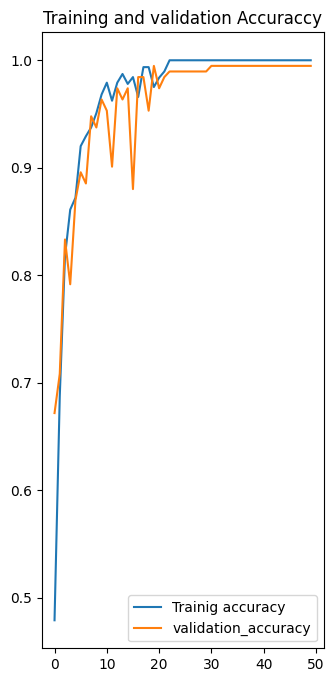

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Trainig accuracy')
plt.plot(range(50),val_acc,label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuraccy')

Text(0.5, 1.0, 'Training and validation loss')

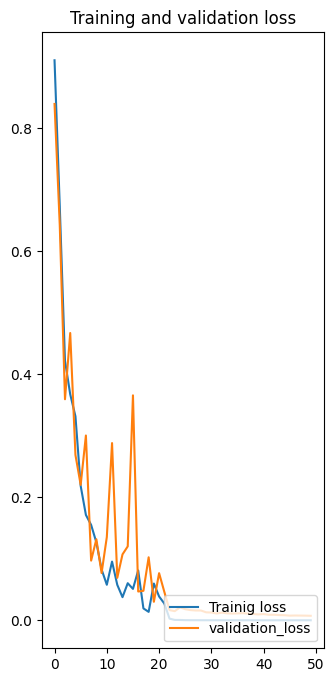

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),loss,label='Trainig loss')
plt.plot(range(50),val_loss,label='validation_loss')
plt.legend(loc='lower right')
plt.title('Training and validation loss')

In [33]:
# Save the model in the SavedModel format
model.save('/content/my_model.h5')


#Inference on Test Dataset

Potato___Late_blight
now predict the label
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Potato___Late_blight


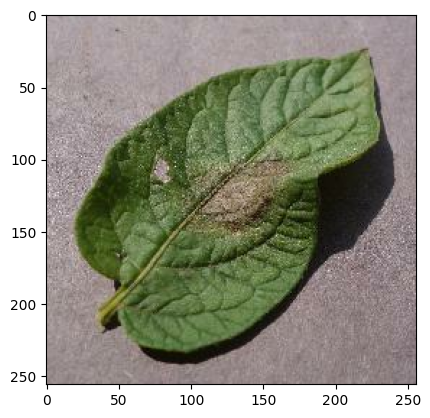

In [49]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  actual= label_batch[0].numpy()
  print(classes[actual])
  print("now predict the label")
  batch_prediction= model.predict(image_batch)
  print(classes[np.argmax(batch_prediction[0])])






In [60]:
def prediction(model, image):
  image_Arr = tf.keras.preprocessing.image.img_to_array(image)
  image_Arr= tf.expand_dims(image_Arr,0)
  Predictions = model.predict(image_Arr)
  prediction_class=classes[np.argmax(Predictions[0])]
  confidence= round(100*(np.max(Predictions[0])),2)
  return prediction_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


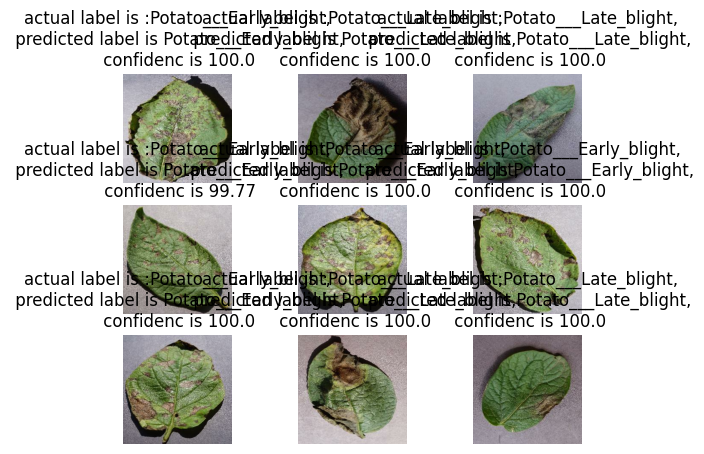

In [69]:
for image_batch, label_batch in test_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis("off")
    pred_class,conf= prediction(model,image_batch[i].numpy())
    actual_class= classes[label_batch[i].numpy()]
    plt.title(f'actual label is :{actual_class},\n predicted label is {pred_class},\n confidenc is {conf}')







In [74]:
version=1
model.export(f"/content/{version}")

Saved artifact at '/content/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140527306177200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306177376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306177024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306248208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306248384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306244688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306250144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306245744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306251904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306248912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140527306253664: Ten